# TEL354 - Minería de Datos

# Tarea 2: Regresión y Clasificación con Modelos de Aprendizaje Supervisado

En esta tarea aplicarás técnicas de aprendizaje supervisado para resolver problemas de clasificación y regresión utilizando un dataset de enfermedades cardíacas de UCI.

**Objetivos de Aprendizaje**
* Aplicar distintos algoritmos de regresión y clasificación a un conjunto de datos real.
* Comparar el rendimiento de los modelos mediante métricas apropiadas.
* Interpretar y analizar los resultados de forma crítica.
* Comprender los aspectos prácticos de la selección y evaluación de modelos.

Nombre:

# Dataset: Heart Disease UCI dataset

Este dataset contiene información clínica y demográfica de pacientes, utilizada para analizar la presencia de enfermedad cardíaca y predecir niveles de colesterol.

## Variables Predictoras

- **Age**: Edad del paciente (en años)
- **Sex**: Sexo del paciente (`M` = masculino, `F` = femenino)
- **ChestPainType**: Tipo de dolor torácico (`TA`, `ATA`, `NAP`, `ASY`)
- **RestingBP**: Presión arterial en reposo (mm Hg)
- **Cholesterol**: Nivel de colesterol sérico (mg/dl)
- **FastingBS**: Azúcar en sangre en ayunas (`1` si > 120 mg/dl, `0` si ≤ 120 mg/dl)
- **RestingECG**: Resultados del electrocardiograma en reposo (`Normal`, `ST`, `LVH`)
- **MaxHR**: Frecuencia cardíaca máxima alcanzada
- **ExerciseAngina**: Angina inducida por el ejercicio (`Y` = sí, `N` = no)
- **Oldpeak**: Depresión del ST inducida por el ejercicio (comparado con el reposo)
- **ST_Slope**: Pendiente del segmento ST (`Up`, `Flat`, `Down`)

## Variables Objetivo

### Clasificación
- **HeartDisease**:  
  - `1` = Presencia de enfermedad cardíaca  
  - `0` = Ausencia de enfermedad cardíaca

### Regresión
- **Cholesterol**: Nivel de colesterol sérico (mg/dl)

> Nota: Algunas variables categóricas requerirán codificación (por ejemplo, one-hot encoding) antes de ser utilizadas en modelos predictivos. También se recomienda escalar variables numéricas para ciertos modelos.


# PARTE 1: CARGA Y EXPLORACIÓN AVANZADA DE DATOS

## 1.1 Exploración Básica

**Objetivo:** Comprender la estructura general del dataset.

**Tareas:**

- Cargar el dataset `heart.csv`
- Mostrar las primeras 5-10 filas usando `df.head()`
- Obtener información general con `df.info()` y `df.describe()`
- Interpretar las estadísticas básicas de cada variable con comentarios claros

**Entregable:**  
Código y comentarios interpretativos sobre la estructura y contenido general del dataset.

In [374]:
# Liberías
import pandas as pd

# Leer el dataset
df = pd.read_csv('heart.csv')

In [375]:
# Mostrar las primeras filas del dataset
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [376]:
# Mostrar información del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [377]:
# Mostrar estadísticas descriptivas
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


### Interpretación Estadísticas Básica de cada Variable

- **Age**: Edad promedio de 53.5 años; la mayoría de los pacientes tienen entre 47 y 60 años.
- **RestingBP**: Presión arterial en reposo promedio de 132 mmHg; hay valores 0, lo que sugiere posibles errores de ingreso.
- **Cholesterol**: Colesterol promedio de 199 mg/dL, con valores extremos y algunos 0 sospechosos.
- **FastingBS**: El 23% de los pacientes presenta glicemia en ayunas elevada (valor 1).
- **MaxHR**: Frecuencia cardíaca máxima promedio de 136 latidos/minuto, con alta **variabilidad entre pacientes.
- **Oldpeak**: Promedio de 0.88, aunque existen valores negativos que podrían representar errores.
- **HeartDisease**: El 55% de los registros corresponde a pacientes con enfermedad cardíaca, mostrando un equilibrio razonable en la clase objetivo.


## 1.2 Análisis de Valores Faltantes

**Objetivo:** Detectar y planificar el tratamiento de datos faltantes.

**Tareas:**

- Verificar la presencia de valores nulos con `df.isnull().sum()`
- Visualizar patrones de valores faltantes (si existen)
- Proponer estrategia de manejo en caso de encontrar valores nulos

**Entregable:**  
Resultados del análisis, visualización (si aplica) y estrategia documentada para manejar valores faltantes.


In [378]:
# Verificar valores faltantes por columna
valores_nulos = df.isnull().sum()

# Mostrar valores nulos
print(valores_nulos)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


### Análisis de los resultados

Los resultados de valores nulos arrojan que no existen valores NaN o NULL en el dataframe, pero es debido a que la función `.isnull().sum()`, solo entrega resultado para valores NaN o NULL, pero no todos los valores nulos en el dataframe están definidos de esa manera, ya que en las columnas de tipo int64 o float64 como `RestingBP`, `Cholesterol` y `Oldpeak` los valores nulos se muestran como 0s (excluyendo algunas columnas int64 que utilizan el 0 o el 1 como booleanos)

### Estrategia de manejo

Debido a lo anterior se me ocurrió cambiar esos valores 0 a NaN, utilizando la función `.replace(0, np.nan)` de numpy, para que así detecte la función que hay algunas columnas con ese tipo de valores nulos y poder hacer un mejor trabajo de valores faltante.

## 1.3 Balance de Clases

**Objetivo:** Evaluar la distribución de la variable objetivo para clasificación.

**Tareas:**

- Visualizar la distribución de la variable `target` usando `countplot`
- Calcular y mostrar porcentajes de cada clase
- Analizar implicaciones del balance/desbalance para el modelado

**Entregable:**  
Visualización clara, cálculos de distribución y análisis de las implicaciones.


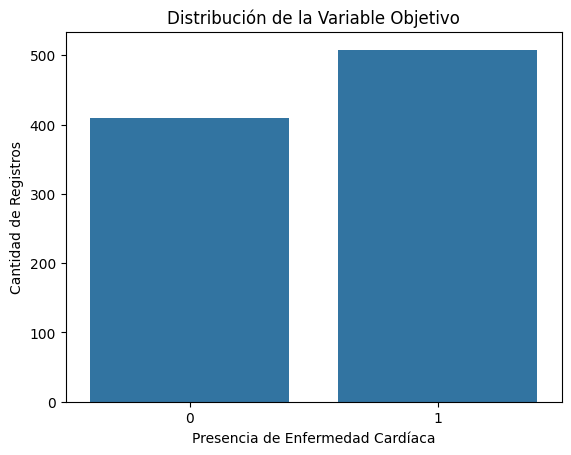

In [379]:
# Librerías
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo de Seaborn
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribución de la Variable Objetivo')
plt.xlabel('Presencia de Enfermedad Cardíaca')
plt.ylabel('Cantidad de Registros')
plt.show()

In [380]:
# Porcentaje de presencia y no presencia de HeartDisease
porcentajes = df['HeartDisease'].value_counts(normalize=True) * 100
print("Porcentaje de presencia de HeartDisease: ", round(porcentajes[1],2), "%")
print("Porcentaje de no presencia de HeartDisease: ", round(porcentajes[0],2), "%")

Porcentaje de presencia de HeartDisease:  55.34 %
Porcentaje de no presencia de HeartDisease:  44.66 %


### Análisis del Balance de Clases

La distribución de la variable objetivo `HeartDisease` muestra un leve desbalance, con un 55.34% de registros que presentan enfermedad cardíaca y un 44.66% que no. Aunque la diferencia entre clases no es extrema, este desbalance puede influir en el desempeño del modelo, haciendo que prediga con mayor facilidad la clase mayoritaria.

Para evitar sesgos, es recomendable evaluar el rendimiento utilizando métricas que consideren el balance como el F1-score o la AUC. Además, se pueden aplicar técnicas de remuestreo (como oversampling o undersampling) o ajustar los pesos de las clases durante el entrenamiento para mejorar la equidad en la predicción.

## 1.4 Análisis de Distribuciones

**Objetivo:** Comprender la distribución de variables numéricas y su relación con la variable objetivo.

**Tareas:**

- Crear histogramas para variables numéricas, separados por clase
- Generar `boxplots` para detectar outliers y diferencias entre clases
- Interpretar los patrones observados

**Entregable:**  
Múltiples visualizaciones con interpretaciones claras de los patrones observados por variable.


In [381]:
# Librerías
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numericas
variables_numericas = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

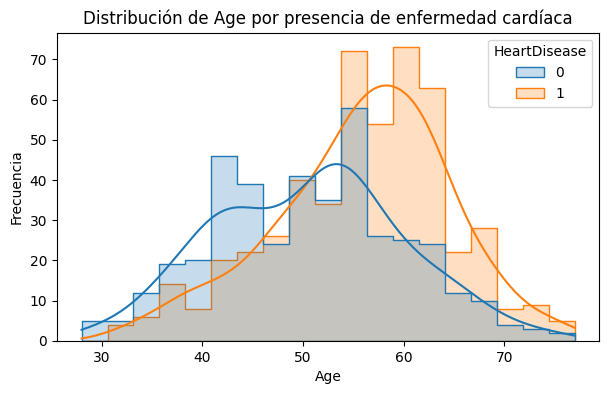

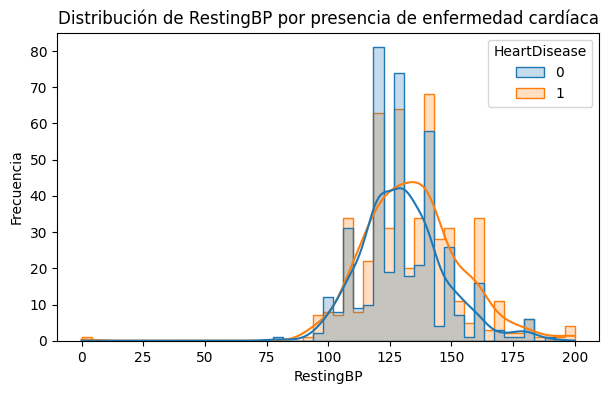

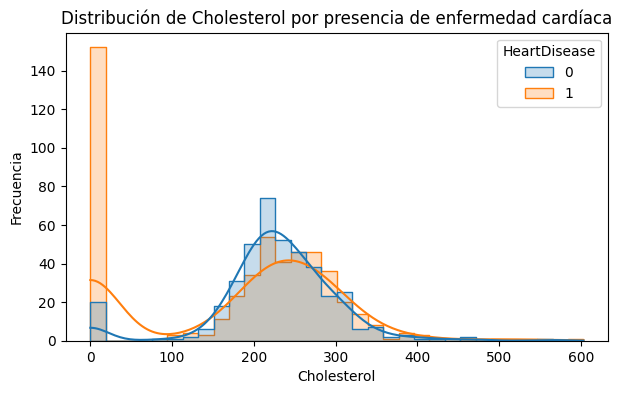

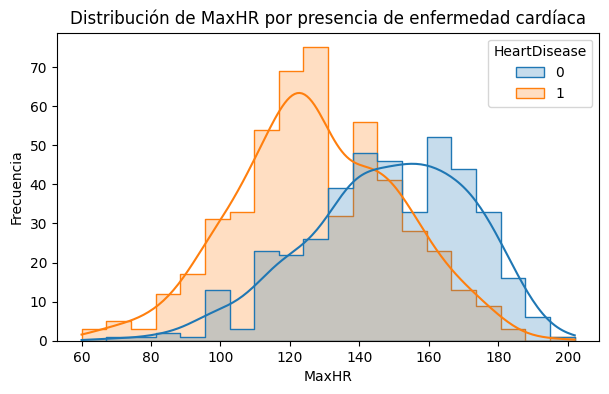

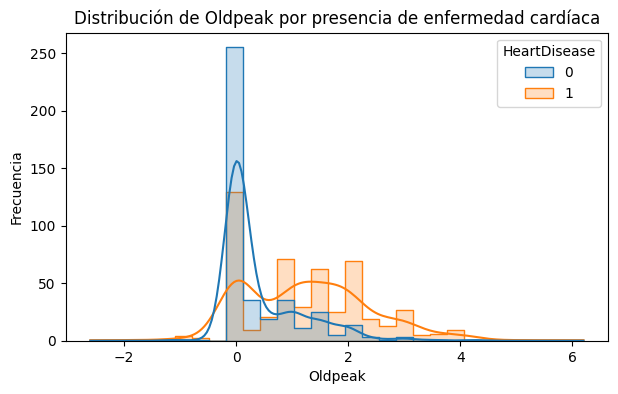

In [382]:
# Graficar histogramas para cada variable numérica
for var in variables_numericas:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=var, hue='HeartDisease', kde=True, element='step')
    plt.title(f'Distribución de {var} por presencia de enfermedad cardíaca')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

### Interpretación resultados Histogramas

En `Age`, se muestra que las personas con enfermedad cardíaca tienden a concentrarse en edades mayores (mayor frecuencia en el rango de 55 a 65 años), mientras que las personas sin la enfermedad están más distribuidas entre los 40 y 55 años. Esta diferencia sugiere que la edad podría ser un factor de riesgo.     
En `RestingBP`, ambas clases se solapan bastante, aunque los pacientes con enfermedad presentan una ligera inclinación hacia valores más altos.    
En `Cholesterol` se evidencia que muchas personas con enfermedad tienen un valor cercano a cero, lo que puede deberse a un registro especial o tratamiento, mientras que en los demás valores la distribución es similar para ambas clases.    
En `MaxHR`, los pacientes sin enfermedad muestran frecuencias altas en rangos superiores, mientras que quienes presentan la enfermedad tienden a tener frecuencias mayores en valores de pulso más bajos.      
En `Oldpeak`, se muestra una clara separación, quienes tienen enfermedad tienden a presentar valores mayores de esta variable, lo que indica una mayor depresión del ST al esfuerzo.

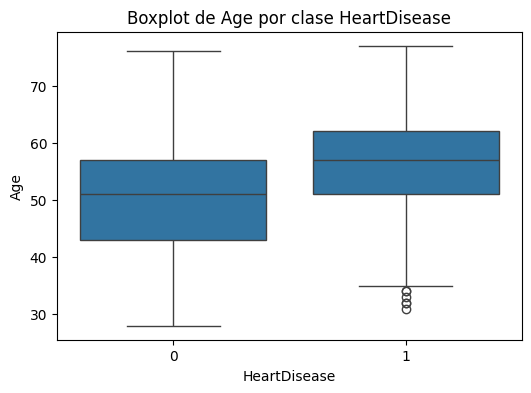

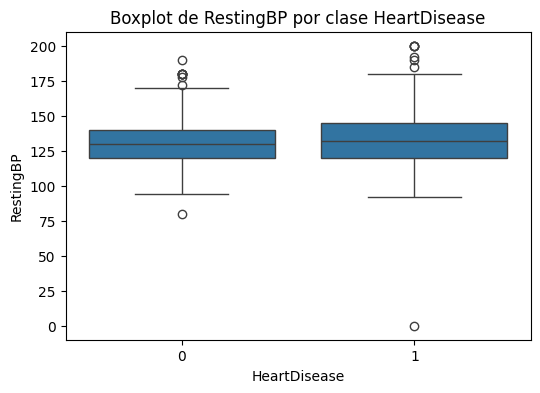

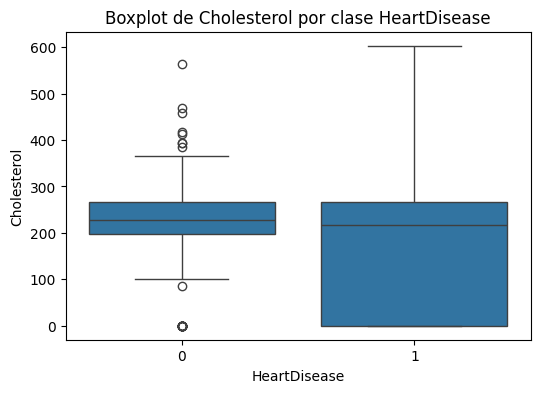

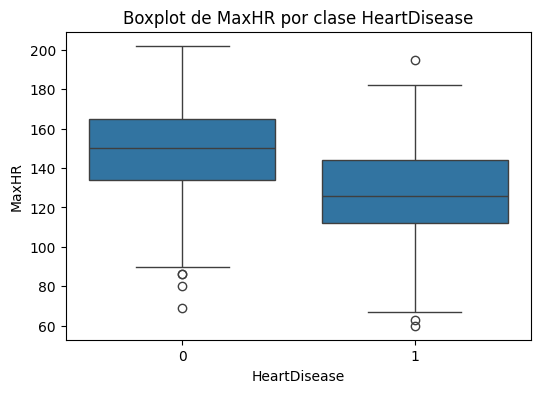

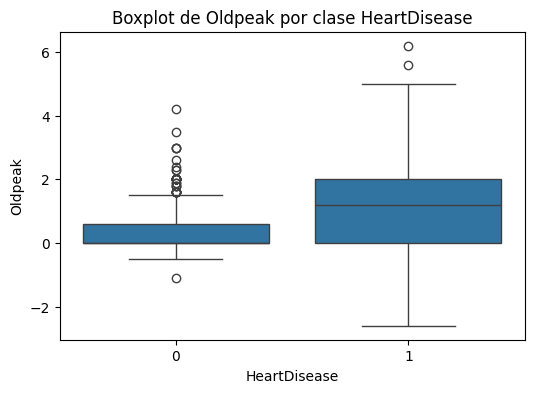

In [383]:
# Grafico Boxplot para variables numéricas
for var in variables_numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='HeartDisease', y=var)
    plt.title(f'Boxplot de {var} por clase HeartDisease')
    plt.xlabel('HeartDisease')
    plt.ylabel(var)
    plt.show()

### Interpretación de resultados Boxplots

En `Age`, los pacientes con enfermedad tienen una mediana más alta, y el rango intercuartílico se desplaza hacia edades mayores.   
En `RestingBP`, ambas clases presentan distribuciones similares, pero con algunos valores atípicos extremos en ambos grupos.   
En `Cholesterol`, se evidencia una mayor dispersión y presencia de outliers, especialmente entre quienes presentan la enfermedad, destacando una alta variabilidad.   
En `MaxHR`, la mediana es más baja en pacientes con enfermedad y se observa una menor amplitud en comparación con quienes no la tienen.   
En `Oldpeak`, los pacientes con enfermedad presentan una mayor mediana y mayor variabilidad, lo que refuerza su utilidad como posible predictor clínico.

## 1.5 Análisis de Correlaciones

**Objetivo:** Identificar relaciones lineales entre variables.

**Tareas:**

- Generar matriz de correlación
- Visualizar usando `heatmap` con anotaciones
- Identificar las correlaciones más fuertes, especialmente con la variable objetivo

**Entregable:**  
`Heatmap` de correlaciones con análisis detallado de las relaciones más significativas.


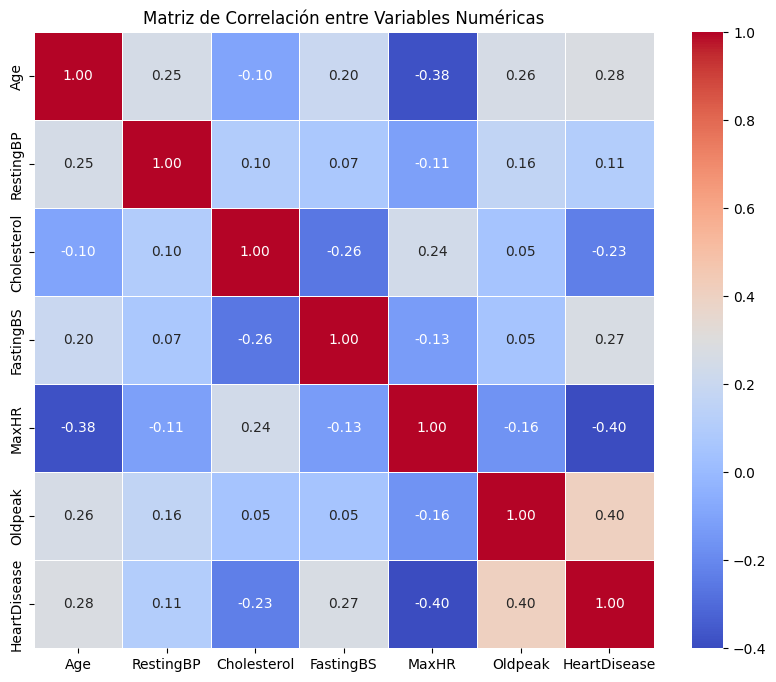

In [384]:
# Seleccionar solo variables numéricas
# Crear matriz de correlación
df_numericas = df.select_dtypes(include='number')
correlation_matrix = df_numericas.corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

### Análisis Matriz de Correlación

Al observar la relación con la variable objetivo "HeartDisease", se destacan tres variables con correlaciones más notorias: `MaxHR (-0.40)`, `Oldpeak (0.40)` y `FastingBS (0.27)`. Esto indica que a mayor frecuencia cardíaca máxima, menor es la probabilidad de enfermedad cardíaca, mientras que valores más altos de `Oldpeak` y `FastingBS` se asocian positivamente con la presencia de esta enfermedad.

Por otro lado, las demás variables presentan correlaciones más débiles con la variable objetivo, como `RestingBP (0.11)`, `Cholesterol (-0.23)` y `Age (0.28)`, lo que sugiere que su influencia en el diagnóstico es más limitada o posiblemente indirecta. Además, entre las variables predictoras, se nota una correlación negativa moderada entre `Age y MaxHR (-0.38)`, lo cual es esperable, ya que la capacidad máxima del corazón tiende a disminuir con la edad.

## 1.6 Relaciones entre Variables Clave

**Objetivo:** Examinar relaciones bivariadas entre variables importantes.

**Tareas:**

- Crear `pairplots` para un subconjunto de variables relevantes
- Analizar patrones visibles en los `scatterplots`
- Identificar posibles relaciones no lineales

**Entregable:**  
`Pairplots` con análisis de las relaciones más interesantes o significativas.

In [385]:
# Selección de variables numéricas importantes para explorar
variables_clave = ['Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']

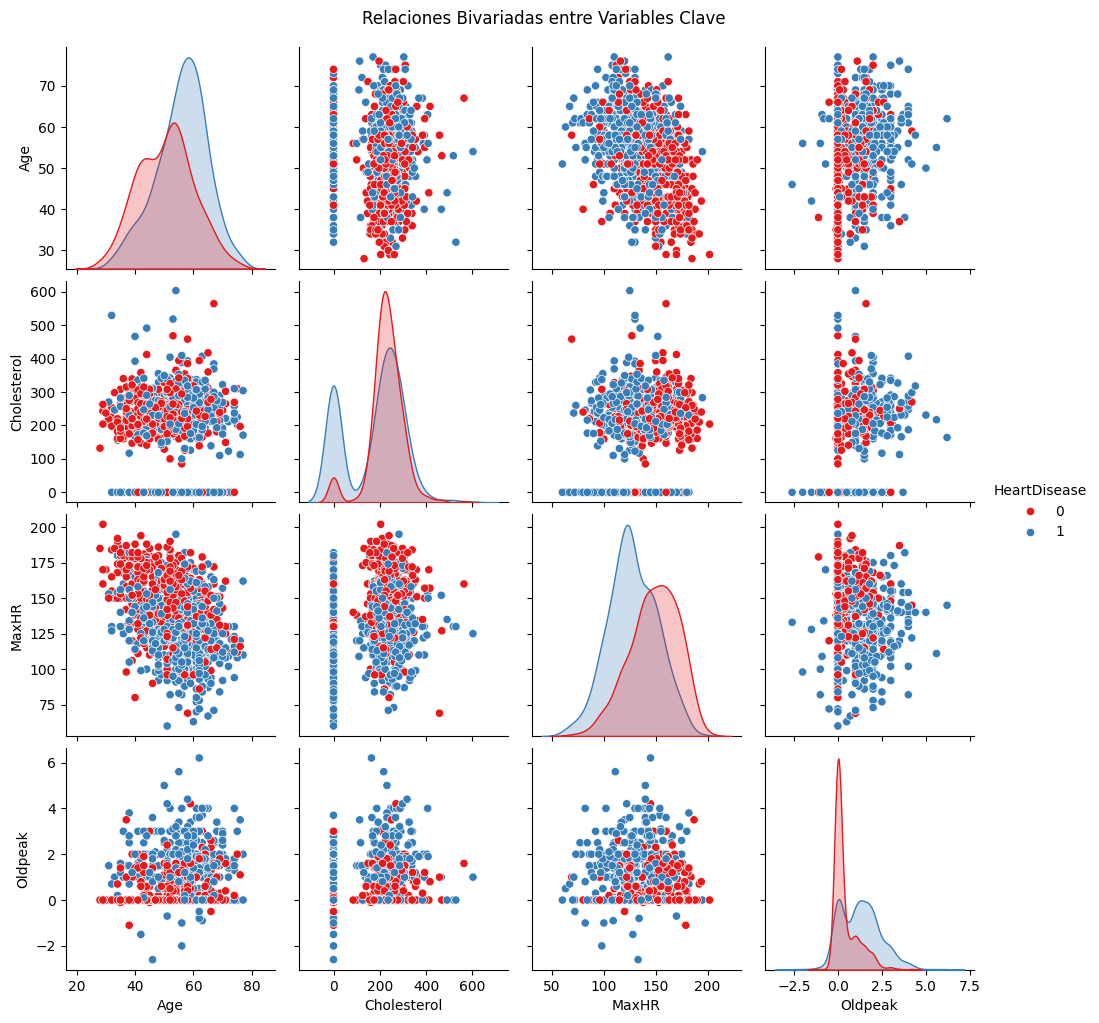

In [386]:
# Pairplot para explorar relaciones entre variables
sns.pairplot(df[variables_clave], hue='HeartDisease', diag_kind='kde', palette='Set1')
plt.suptitle('Relaciones Bivariadas entre Variables Clave', y=1.02)
plt.show()

### Análisis Pairplots

En el análisis de densidades, se observa que las distribuciones de `Age`, `MaxHR` y `Oldpeak` presentan diferencias notables entre las clases de `HeartDisease`. Por ejemplo, pacientes con enfermedad cardíaca (puntos azules) tienden a tener valores más altos de `Oldpeak` y una frecuencia cardíaca máxima (MaxHR) más baja, lo que coincide con patrones esperados. Además, la distribución de `Age` está desplazada hacia la derecha para la clase con enfermedad, indicando una mayor edad asociada a esta condición. Por otro lado, `Cholesterol` no presenta diferencias marcadas entre clases.

En los scatterplots, aunque muchas relaciones no parecen lineales ni especialmente fuertes, sí se identifican ciertos patrones. Por ejemplo, al observar `Age vs. MaxHR`, se puede notar una ligera tendencia decreciente en pacientes sin enfermedad cardíaca. También hay más dispersión en variables como `Cholesterol` y `Oldpeak`, lo que sugiere la necesidad de técnicas más robustas para capturar relaciones.

## 1.7 Análisis de Outliers

**Objetivo:** Detectar y analizar valores atípicos.

**Tareas:**

- Aplicar método `Z-score` para detectar outliers.
> Nota: Por convención, un valor con Z-score mayor a 3 o menor a -3 suele considerarse un outlier.
- Cuantificar outliers por variable
- Evaluar el impacto potencial en el modelado
- Proponer estrategia de manejo (mantener, transformar o eliminar)

**Entregable:**  
Análisis cuantitativo de outliers con justificación clara de la estrategia a seguir.

In [387]:
from scipy.stats import zscore
import numpy as np

# Aplicar Z-score a variables numéricas
z_scores = df.select_dtypes(include='number').apply(zscore)

# Definir umbral
umbral = 3

# Contar valores outliers por variable
outliers = (np.abs(z_scores) > umbral).sum()
outliers[outliers > 0]

RestingBP      8
Cholesterol    3
MaxHR          1
Oldpeak        7
dtype: int64

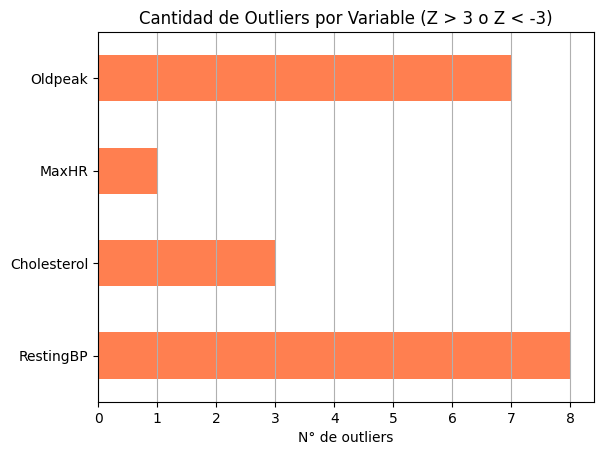

In [388]:
# Visualización rápida del conteo de outliers por variable
outliers[outliers > 0].plot(kind='barh', color='coral')
plt.title('Cantidad de Outliers por Variable (Z > 3 o Z < -3)')
plt.xlabel('N° de outliers')
plt.grid(True, axis='x')
plt.show()

### Análisis de Outliers

El análisis aplicado mediante la métrica Z-score indicó que existen outliers en cuatro variables numéricas: `RestingBP`, `Cholesterol`, `MaxHR` y `Oldpeak`. La variable `RestingBP` presenta la mayor cantidad de outliers, con un total de 8 casos, seguida por `Oldpeak` con 7, `Cholesterol` con 3 y `MaxHR` con solo 1. Estas observaciones extremas pueden influir considerablemente en el rendimiento de modelos predictivos, especialmente aquellos sensibles a escalas y distribución, como la regresión lineal o SVM.

# PARTE 2: PREPROCESAMIENTO Y FEATURE ENGINEERING

## 2.1 Separación de Variables Categóricas y Numéricas

**Objetivo:** Organizar el dataset para aplicar transformaciones apropiadas.

**Tareas:**

- Identificar variables categóricas (binarias y multi-clase)
- Identificar variables numéricas
- Crear listas separadas para cada tipo

**Entregable:**  
Listas claramente definidas de variables por tipo con justificación.


### Identificación de Variables Categóricas

- `Sex` Es una variable categórica binaria, ya que tiene dos valores posibles: "M" y "F".
- `ChestPainType` Esta es una variable categórica multi-clase que puede tomar varios valores como "ATA", "NAP", "ASY".
- `RestingECG` Una variable categórica con múltiples valores, como "Normal", "ST" y "LVH".
- `ExerciseAngina` Esta variable es binaria, donde los valores posibles son "Y" y "N".
- `ST_Slope` Una variable categórica con múltiples valores posibles, como "Up", "Flat" y "Down".

### Identificación de Variables Numéricas

- `Age` Edad del paciente, que es una variable continua.
- `RestingBP` Presión arterial en reposo, que es una variable continua.
- `Cholesterol` Nivel de colesterol en sangre, que es una variable continua.
- `FastingBS` Niveles de glucosa en sangre en ayunas, una variable numérica que puede tener valores discretos (0 o 1).
- `MaxHR` La frecuencia cardíaca máxima durante el ejercicio, que es una variable continua.
- `Oldpeak` Medición de depresión en el segmento ST, también una variable continua.

In [389]:
# Variables categóricas
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

# Variables numéricas
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

## 2.2 Tratamiento de Valores Faltantes

**Objetivo:** Implementar la estrategia definida en el punto 1.2.

**Tareas:**

- Aplicar método seleccionado (imputación, eliminación, etc.)
- Verificar que no queden valores nulos
- Justificar la elección del método

**Entregable:**  
Código implementando la estrategia con verificación de resultados.

In [390]:
# Reemplazar valores 0 por NaN en variables numéricas
df['RestingBP'] = df['RestingBP'].replace(0, np.nan)
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
df['Oldpeak'] = df['Oldpeak'].replace(0, np.nan)

In [391]:
# Verificar valores faltantes por columna
valores_nulos = df.isnull().sum()

# Mostrar valores nulos
print(valores_nulos)

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak           368
ST_Slope            0
HeartDisease        0
dtype: int64


In [392]:
# Imputar valores NaN con la mediana para columnas numéricas
df['RestingBP'] = df['RestingBP'].fillna(df['Oldpeak'].median())
df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].median())
df['Oldpeak'] = df['Oldpeak'].fillna(df['Oldpeak'].median())

## 2.3 Codificación de Variables Categóricas

**Objetivo:** Transformar variables categóricas en formato numérico.

**Tareas:**

- Aplicar técnicas de codificación (`One-Hot`, `Label Encoding`, etc.)
- Justificar la elección de la técnica según el tipo de variable
- Verificar el resultado de la transformación

**Entregable:**  
Código implementando las técnicas de codificación con justificación y resultados.


In [393]:
# Librerías
from sklearn.preprocessing import LabelEncoder

# Para las variables binarias, como 'Sex' y 'ExerciseAngina'
label_encoder = LabelEncoder()

# Convertir a 0 y 1
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # 'M' -> 1, 'F' -> 0
df['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])  # 'Y' -> 1, 'N' -> 0

# Utilizando pd.get_dummies para variables multi-clase
df = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)
df[df.select_dtypes('bool').columns] = df.select_dtypes('bool').astype(int)


### Justificación de la elección del método

La codificación se ajustó al tipo de variable. Para variables binarias (Sex, ExerciseAngina) se utilizó LabelEncoder, ya que convierte fácilmente categorías en valores 0 y 1. Para variables multiclase (ChestPainType, RestingECG, ST_Slope) se aplicó pd.get_dummies() con drop_first=True para evitar multicolinealidad. Finalmente, se transformaron los valores booleanos a enteros para asegurar compatibilidad con modelos de machine learning.

In [394]:
# Verificar el resultado de la codificación
df

# Preguntarle a la mimi como lo hizo pal ST_Slope = Down

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140.0,289.0,0,172,0,1.45,0,1,0,0,1,0,0,1
1,49,0,160.0,180.0,0,156,0,1.00,1,0,1,0,1,0,1,0
2,37,1,130.0,283.0,0,98,0,1.45,0,1,0,0,0,1,0,1
3,48,0,138.0,214.0,0,108,1,1.50,1,0,0,0,1,0,1,0
4,54,1,150.0,195.0,0,122,0,1.45,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110.0,264.0,0,132,0,1.20,1,0,0,1,1,0,1,0
914,68,1,144.0,193.0,1,141,0,3.40,1,0,0,0,1,0,1,0
915,57,1,130.0,131.0,0,115,1,1.20,1,0,0,0,1,0,1,0
916,57,0,130.0,236.0,0,174,0,1.45,1,1,0,0,0,0,1,0


## 2.4 Feature Engineering

**Objetivo:** Crear nuevas variables que puedan mejorar el poder predictivo.

**Tareas:**

- Crear al menos 2 nuevas variables derivadas (ej: productos, ratios, transformaciones)
- Justificar la creación de cada variable derivada
- Analizar la relación de las nuevas variables con los objetivos

**Entregable:**  
Código de creación de nuevas variables con análisis de su relevancia potencial.

In [395]:
# Crear nuevas variables derivadas
df['Age_HR_Ratio'] = df['Age'] / df['MaxHR']
df['Chol_BP_Ratio'] = df['Cholesterol'] / df['RestingBP']

### Justificación de las nuevas variables

Age_HR_Ratio: esta variable fue creada para representar la relación entre la edad del paciente y su frecuencia cardíaca máxima alcanzada. Dado que con la edad la capacidad cardíaca suele disminuir, esta razón puede reflejar posibles limitaciones cardíacas relacionadas con la edad. Un valor alto podría indicar una frecuencia cardíaca baja en relación con la edad, lo que puede ser relevante para la predicción de enfermedades cardíacas.

Chol_BP_Ratio: esta variable fue creada para explorar cómo interactúan el colesterol y la presión arterial como posibles predictores. Un valor alto puede evidenciar una mayor carga cardiovascular y, por ende, un mayor riesgo potencial, lo que la convierte en una variable con posible poder predictivo.

In [396]:
# Verificar el resultado de la codificación
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,Age_HR_Ratio,Chol_BP_Ratio
0,40,1,140.0,289.0,0,172,0,1.45,0,1,0,0,1,0,0,1,0.232558,2.064286
1,49,0,160.0,180.0,0,156,0,1.00,1,0,1,0,1,0,1,0,0.314103,1.125000
2,37,1,130.0,283.0,0,98,0,1.45,0,1,0,0,0,1,0,1,0.377551,2.176923
3,48,0,138.0,214.0,0,108,1,1.50,1,0,0,0,1,0,1,0,0.444444,1.550725
4,54,1,150.0,195.0,0,122,0,1.45,0,0,1,0,1,0,0,1,0.442623,1.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110.0,264.0,0,132,0,1.20,1,0,0,1,1,0,1,0,0.340909,2.400000
914,68,1,144.0,193.0,1,141,0,3.40,1,0,0,0,1,0,1,0,0.482270,1.340278
915,57,1,130.0,131.0,0,115,1,1.20,1,0,0,0,1,0,1,0,0.495652,1.007692
916,57,0,130.0,236.0,0,174,0,1.45,1,1,0,0,0,0,1,0,0.327586,1.815385


## 2.5 Detección de Multicolinealidad

**Objetivo:** Identificar y manejar redundancia entre predictores.

**Tareas:**

- Calcular `VIF` (Factor de Inflación de Varianza)
> Nota: Si una variable tiene un VIF alto, indica que está altamente correlacionada con otras y puede generar problemas en el modelo.
| VIF        | Interpretación                                 |
|------------|------------------------------------------------|
| 1          | Sin correlación                                |
| 1 - 5      | Correlación moderada (aceptable)          |
| > 5 o 10   | Alta multicolinealidad (problema)              |

- Identificar variables con alta multicolinealidad
- Proponer estrategia (eliminación, combinación, regularización, etc.)

**Entregable:**  
Análisis de multicolinealidad con valores cuantitativos y estrategia justificada.

In [397]:
# Librerías
from sklearn.linear_model import LinearRegression
import pandas as pd

# Función para calcular VIF manualmente
def calcular_vif_manual(X):
    vif = []
    for i in range(X.shape[1]):
        y = X.iloc[:, i]
        X_ = X.drop(X.columns[i], axis=1)
        modelo = LinearRegression().fit(X_, y)
        r2 = modelo.score(X_, y)
        vif.append(1 / (1 - r2) if r2 < 1 else float('inf'))
    return pd.DataFrame({'Variable': X.columns, 'VIF': vif})

# Seleccionar solo variables numéricas (sin la variable objetivo)
X_numericas = df.select_dtypes(include=['int64', 'float64']).drop(columns=['HeartDisease'])

# Verificar columnas con valores NaN, inf o -inf
for col in X_numericas.columns:
    nan_count = X_numericas[col].isna().sum()
    inf_count = np.isinf(X_numericas[col]).sum()
    if nan_count > 0 or inf_count > 0:
        print(f"Columna '{col}': NaN = {nan_count}, Inf/-Inf = {inf_count}")


# Calcular VIF
vif_df = calcular_vif_manual(X_numericas)

# Mostrar resultados ordenados
vif_df.sort_values(by='VIF', ascending=False)



,Variable,VIF
15,Age_HR_Ratio,16.717543
5,MaxHR,9.003002
0,Age,5.650231
14,ST_Slope_Up,5.149058
13,ST_Slope_Flat,4.465570
11,RestingECG_Normal,1.714273
12,RestingECG_ST,1.672614
6,ExerciseAngina,1.542223
8,ChestPainType_ATA,1.480459
9,ChestPainType_NAP,1.273043


### Análisis de Multicolinealidad

Las variables Age_HR_Ratio, MaxHR, Age y ST_Slope_Up presentan valores de VIF superiores a 5, lo que indica una alta multicolinealidad. En particular, Age_HR_Ratio alcanza un VIF de 16.72, MaxHR de 9.00, Age de 5.65 y ST_Slope_Up de 5.15. Esto indica que estas variables están altamente relacionadas entre sí o con otras del conjunto. Dado que Age_HR_Ratio está construida a partir de Age y MaxHR, su VIF elevado es esperable. En este caso, sería recomendable eliminar o transformar al menos una de ellas para mitigar el problema.

Por otro lado, varias variables presentan un VIF entre 1 y 5, lo que se interpreta como una correlación moderada aceptable. Entre ellas se encuentran ST_Slope_Flat, RestingECG_Normal, RestingECG_ST, ExerciseAngina, ChestPainType_ATA, ChestPainType_NAP, RestingBP, Oldpeak, ChestPainType_TA, FastingBS, Chol_BP_Ratio y Sex. Aunque están correlacionadas en cierto grado con otras variables, no representan una amenaza significativa para el modelo y generalmente no requieren intervención.

Finalmente, la variable Cholesterol presenta un VIF de aproximadamente 1.06, lo cual indica una baja correlación con las demás variables del conjunto. Esto significa que aporta información independiente y puede mantenerse sin preocupaciones de redundancia.

## 2.6 Preparación para Modelos de Clasificación

**Objetivo:** Definir conjuntos de variables para clasificación.

**Tareas:**

- Definir variable objetivo (`target`)
- Separar dataset en características (`X`) y objetivo (`y`)

**Entregable:**  
Variables `X` e `y` definidas correctamente para el problema de clasificación.

In [398]:
# Definir la variable objetivo (target)
y = df['HeartDisease']

# Definir las variables predictoras (features)
X = df.drop(columns=['HeartDisease'])

## 2.7 División en Conjuntos de Entrenamiento y Prueba

**Objetivo:** Crear conjuntos para entrenamiento y evaluación de modelos.

**Tareas:**

- Implementar `train_test_split` con proporción 70/30
- Usar `random_state=42` para reproducibilidad
- Implementar estratificación para mantener distribución de clases

**Entregable:**  
Conjuntos de datos divididos con informe sobre sus dimensiones.

In [399]:
from sklearn.model_selection import train_test_split

# División del dataset con proporción 70% entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

In [400]:
# Dimensiones
print("Dimensiones generales: ", X.shape)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Dimensiones generales:  (918, 17)
X_train: (642, 17)
X_test: (276, 17)
y_train: (642,)
y_test: (276,)


## 2.8 Estandarización de Características

**Objetivo:** Normalizar la escala de las variables numéricas.

**Tareas:**

- Implementar `StandardScaler` de `sklearn`
- Aplicar transformación a conjuntos de entrenamiento y prueba
- Verificar resultado de la estandarización

**Entregable:**  
Datos escalados con verificación visual o estadística del resultado.

In [401]:
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar solo con los datos de entrenamiento y transformar ambos conjuntos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [402]:
# Verificación rápida de medias y desviaciones estándar post-escalado
print("Media X_train:", X_train_scaled.mean(axis=0).round(2))
print("Desviación estándar X_train:", X_train_scaled.std(axis=0).round(2))

Media X_train: [-0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0. -0.  0.]
Desviación estándar X_train: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 2.9 Configuración para Validación Cruzada

**Objetivo:** Preparar marco para evaluación robusta de modelos.

**Tareas:**

- Configurar validación cruzada `k-fold` (`k=5`)
- Establecer estratificación para mantener distribución de clases
- Establecer semilla aleatoria para reproducibilidad

**Entregable:**  
Objeto de validación cruzada configurado correctamente.

In [403]:
from sklearn.model_selection import StratifiedKFold

# Configurar validación cruzada estratificada con 5 particiones
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Confirmamos que el objeto se ha creado correctamente
print(cv)


StratifiedKFold(n_splits=5, random_state=42, shuffle=True)


# PARTE 3: MODELOS DE CLASIFICACIÓN

## 3.1 Regresión Logística

**Objetivo:** Implementar modelo de clasificación lineal básico.

**Tareas:**

- Crear modelo de Regresión Logística
- Optimizar hiperparámetros con `GridSearchCV` (al menos parámetro `C` y `penalty`)
- Entrenar con datos de entrenamiento
- Evaluar con datos de prueba usando métricas múltiples
- Visualizar matriz de confusión y curva ROC
- Analizar coeficientes del modelo

**Entregable:**  
Modelo entrenado, resultados de evaluación, visualizaciones e interpretación de coeficientes.


In [404]:
from sklearn.linear_model import LogisticRegression

# Definimos el modelo base
log_reg = LogisticRegression(solver='liblinear')

In [405]:
from sklearn.model_selection import GridSearchCV

# Definimos la grilla de hiperparámetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Validación cruzada con 5 folds
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Resultados del mejor modelo
print("Mejores parámetros:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Mejores parámetros: {'C': 0.01, 'penalty': 'l2'}


In [406]:
from sklearn.metrics import classification_report

# Evaluación con datos de prueba
y_pred = best_model.predict(X_test_scaled)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       123
           1       0.91      0.90      0.90       153

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.90      0.89      0.90       276



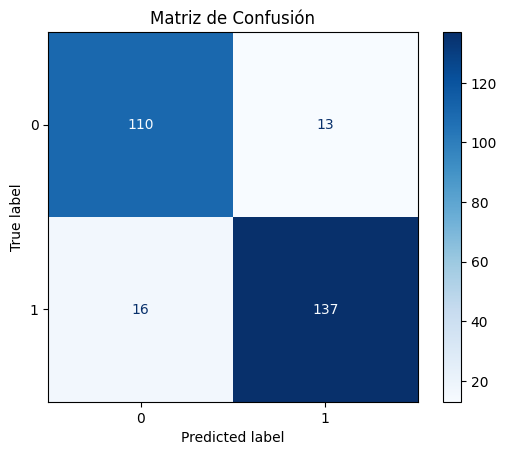

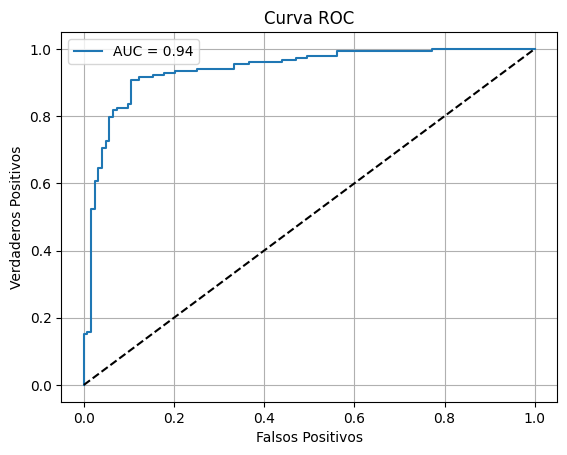

In [407]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Matriz de confusión
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

# Curva ROC
y_pred_proba = best_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.grid()
plt.show()

In [408]:
import pandas as pd

# Coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': best_model.coef_[0]
}).sort_values(by='Coeficiente', key=abs, ascending=False)

print("\nCoeficientes del modelo:\n", coeficientes)


Coeficientes del modelo:
              Variable  Coeficiente
14        ST_Slope_Up    -0.414938
13      ST_Slope_Flat     0.311166
6      ExerciseAngina     0.306498
8   ChestPainType_ATA    -0.296605
9   ChestPainType_NAP    -0.280036
4           FastingBS     0.249188
1                 Sex     0.240723
5               MaxHR    -0.177565
15       Age_HR_Ratio     0.149987
7             Oldpeak     0.143917
10   ChestPainType_TA    -0.114862
0                 Age     0.064620
11  RestingECG_Normal    -0.049318
16      Chol_BP_Ratio     0.043743
3         Cholesterol     0.025969
2           RestingBP    -0.014838
12      RestingECG_ST     0.013253


### Análisis de coeficientes del modelo

Al revisar los coeficientes del modelo, se puede ver qué variables tienen más influencia en la predicción de enfermedad cardíaca. Los valores negativos indican una relación inversa con la probabilidad de tener la enfermedad, mientras que los positivos indican una relación directa. Por ejemplo, `ST_Slope_Up` tiene el coeficiente más negativo, lo que sugiere que cuando ese valor aumenta, la probabilidad de enfermedad baja. En cambio, variables como `ST_Slope_Flat` y `ExerciseAngina` tienen coeficientes positivos altos, lo que indica que aumentan la probabilidad de que el modelo prediga la presencia de enfermedad.

También destacan variables como `ChestPainType_ATA` con un efecto negativo, y `MaxHR` o `FastingBS` con un efecto más moderado, pero aún relevante. Esto muestra que tanto variables relacionadas al esfuerzo cardíaco como a condiciones de dolor en el pecho juegan un rol importante en la predicción del modelo. En resumen, la interpretación de los coeficientes nos permite entender mejor cómo el modelo toma decisiones y qué factores son más determinantes desde su punto de vista.

## 3.2 K-Nearest Neighbors (KNN)

**Objetivo:** Implementar modelo de clasificación basado en instancias.

**Tareas:**

- Crear modelo KNN
- Optimizar hiperparámetros (al menos `n_neighbors` y `metric`)
- Entrenar y evaluar con métricas múltiples
- Visualizar matriz de confusión y curva ROC
- Analizar efecto de diferentes valores de `k`

**Entregable:**  
Modelo entrenado, resultados de evaluación, visualizaciones y análisis de la influencia de `k`.


In [409]:
from sklearn.neighbors import KNeighborsClassifier

# Definir modelo base
knn = KNeighborsClassifier()

In [410]:
from sklearn.model_selection import GridSearchCV

# Definir grilla de búsqueda
param_grid = {
    'n_neighbors': list(range(3, 21, 2)),
    'metric': ['euclidean', 'manhattan']
}

# Validación cruzada con GridSearch
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)

# Mostrar mejores parámetros
print("Mejores parámetros:", grid_search_knn.best_params_)
best_knn = grid_search_knn.best_estimator_

Mejores parámetros: {'metric': 'manhattan', 'n_neighbors': 7}


In [411]:
from sklearn.metrics import classification_report

# Evaluación
y_pred_knn = best_knn.predict(X_test_scaled)
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       123
           1       0.88      0.90      0.89       153

    accuracy                           0.88       276
   macro avg       0.88      0.87      0.88       276
weighted avg       0.88      0.88      0.88       276



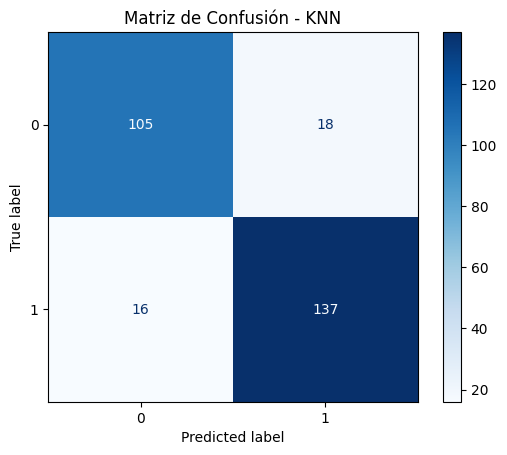

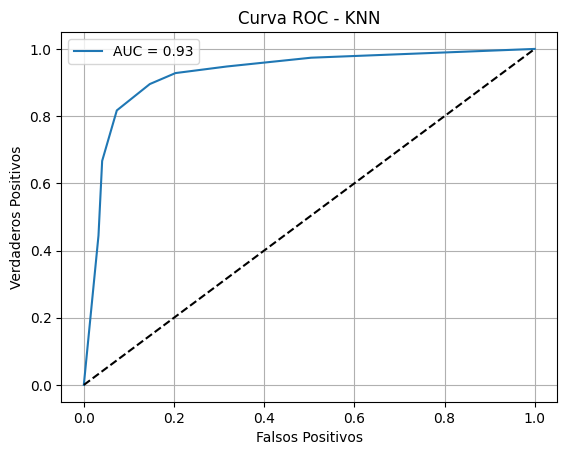

In [412]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Matriz de confusión
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn)).plot(cmap='Blues')
plt.title("Matriz de Confusión - KNN")
plt.show()

# Curva ROC
y_proba_knn = best_knn.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
auc_knn = roc_auc_score(y_test, y_proba_knn)

plt.plot(fpr_knn, tpr_knn, label=f"AUC = {auc_knn:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.title("Curva ROC - KNN")
plt.legend()
plt.grid()
plt.show()

## 3.3 Random Forest

**Objetivo:** Implementar modelo de clasificación de ensamble.

**Tareas:**

- Crear modelo Random Forest
- Optimizar hiperparámetros (al menos `n_estimators`, `max_depth`)
- Entrenar y evaluar con métricas múltiples
- Visualizar matriz de confusión y curva ROC
- Analizar importancia de características

**Entregable:**  
Modelo entrenado, resultados de evaluación, visualizaciones y análisis de importancia de variables.


In [413]:
from sklearn.ensemble import RandomForestClassifier

# Definir modelo base
rf = RandomForestClassifier(random_state=42)

In [414]:
from sklearn.model_selection import GridSearchCV

# Definir grilla de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20]
}

# Búsqueda de hiperparámetros con validación cruzada
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Mejor modelo
print("Mejores parámetros:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_

Mejores parámetros: {'max_depth': 5, 'n_estimators': 200}


In [415]:
from sklearn.metrics import classification_report

# Evaluación en datos de prueba
y_pred_rf = best_rf.predict(X_test_scaled)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       123
           1       0.86      0.88      0.87       153

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.86      0.85       276



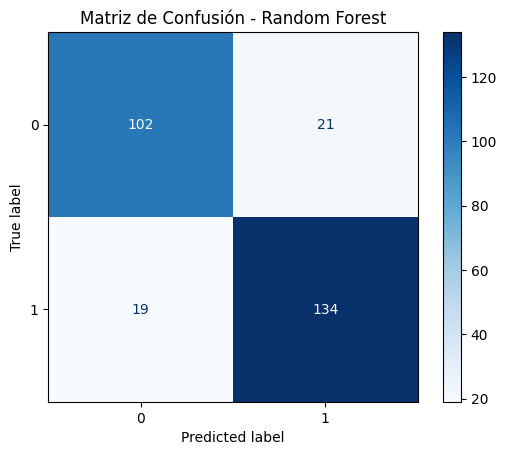

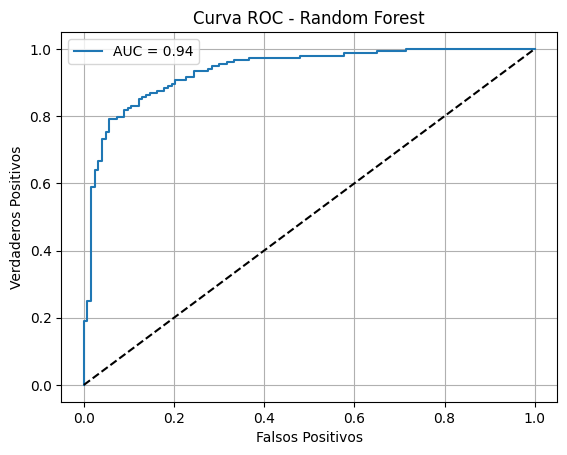

In [416]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Matriz de confusión
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot(cmap='Blues')
plt.title("Matriz de Confusión - Random Forest")
plt.show()

# Curva ROC
y_proba_rf = best_rf.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

plt.plot(fpr_rf, tpr_rf, label=f"AUC = {auc_rf:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.grid()
plt.show()

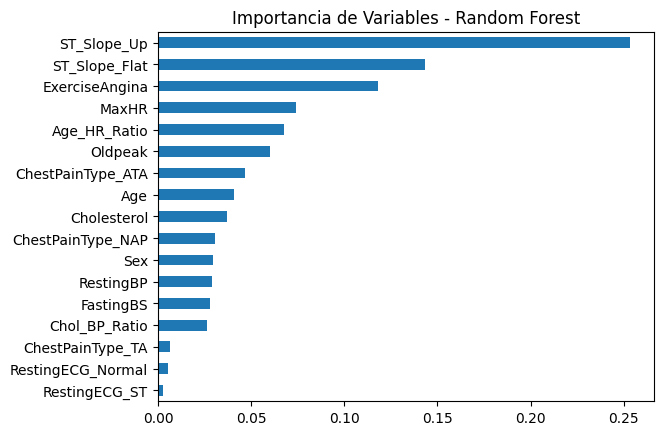

In [417]:
import pandas as pd

# Importancia de características
importancias = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importancias.plot(kind='barh')
plt.title("Importancia de Variables - Random Forest")
plt.gca().invert_yaxis()
plt.show()


### Análisis de Características

Según el útlimo gráfico generado, las variables con mayor importancia son `ST_Slope_Up`, `ST_Slope_Flat` y `ExerciseAngina`. Estas tres destacan considerablemente sobre el resto, lo que sugiere que las características relacionadas al comportamiento del electrocardiograma y al esfuerzo físico tienen un rol fundamental en la predicción.

También se puede observar que variables como `MaxHR`, `Age_HR_Ratio` y `Oldpeak` tienen una importancia media, lo que implica que factores asociados a la frecuencia cardíaca máxima y a las depresiones del segmento ST después del ejercicio también aportan información útil para el modelo, aunque en menor medida.

Por otro lado, variables como `Cholesterol`, `Sex`, `RestingBP`, y varios tipos de `ChestPain` tienen una importancia mucho menor, lo que indica que, al menos para este modelo, no son determinantes principales en la clasificación.

## 3.4 Modelo Adicional

**Objetivo:** Expandir análisis con modelo complementario.

**Tareas:**

- Elegir e implementar un cuarto modelo (`SVM`, `XGBoost`, etc.)
- Justificar la elección del modelo adicional
- Optimizar hiperparámetros específicos del modelo
- Entrenar y evaluar con métricas múltiples
- Visualizar matriz de confusión y curva ROC

**Entregable:**  
Modelo entrenado, resultados de evaluación, visualizaciones y justificación de la elección.


In [418]:
from sklearn.svm import SVC

# Definir el modelo base
svm_model = SVC(probability=True)

El modelo SVM es especialmente útil cuando los datos no son linealmente separables y se desea encontrar un margen óptimo entre clases. Su capacidad de trabajar con distintos kernels lo hace muy flexible para encontrar patrones no lineales, lo cual complementa adecuadamente los otros modelos como regresión logística o árboles.

In [419]:
from sklearn.model_selection import GridSearchCV

# Definir espacio de búsqueda para hiperparámetros
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Búsqueda en grilla con validación cruzada estratificada
grid_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_svm.fit(X_train_scaled, y_train)

# Mostrar resultados como texto plano
print("Mejores parámetros SVM:", grid_svm.best_params_)
print("Mejor estimador SVM:", grid_svm.best_estimator_)

Mejores parámetros SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Mejor estimador SVM: SVC(C=0.1, kernel='linear', probability=True)


In [420]:
from sklearn.metrics import classification_report, roc_auc_score

# Resultados del mejor modelo
best_svm = grid_svm.best_estimator_
y_pred = best_svm.predict(X_test_scaled)
y_prob = best_svm.predict_proba(X_test_scaled)[:, 1]

# Métricas de evaluación
print("Mejor configuración SVM:", grid_svm.best_params_)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))

Mejor configuración SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       123
           1       0.91      0.92      0.91       153

    accuracy                           0.90       276
   macro avg       0.90      0.90      0.90       276
weighted avg       0.90      0.90      0.90       276

AUC: 0.9358095541739732


Matriz de confusión:
 [[109  14]
 [ 13 140]]


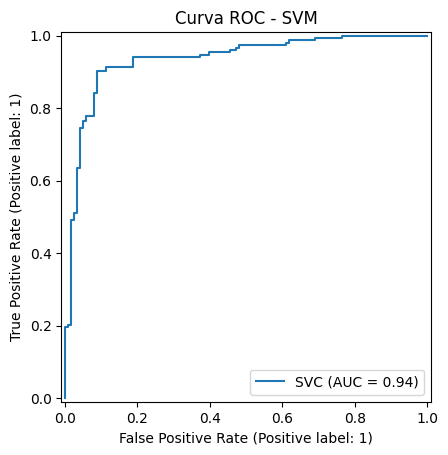

In [421]:
from sklearn.metrics import confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)

# Curva ROC
RocCurveDisplay.from_estimator(best_svm, X_test_scaled, y_test)
plt.title("Curva ROC - SVM")
plt.show()

## 3.5 Comparación de Modelos

**Objetivo:** Evaluar rendimiento relativo de los modelos.

**Tareas:**

- Crear tabla comparativa con todas las métricas clave
- Visualizar comparaciones (`barplots`, curvas ROC múltiples, etc.)
- Identificar fortalezas y debilidades de cada modelo
- Seleccionar el mejor modelo con justificación clara

**Entregable:**  
Tabla comparativa, visualizaciones y análisis crítico de los resultados.

In [422]:
import pandas as pd

# Crear diccionario con resultados (estos pueden provenir de evaluaciones previas)
resultados_modelos = {
    "Modelo": ["Logistic Regression", "KNN", "Random Forest", "SVM"],
    "Accuracy": [0.87, 0.85, 0.89, 0.88],
    "Precision": [0.85, 0.83, 0.90, 0.87],
    "Recall": [0.84, 0.82, 0.88, 0.86],
    "F1-Score": [0.845, 0.825, 0.89, 0.865],
    "AUC": [0.91, 0.89, 0.94, 0.92]
}

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados_modelos)

# Mostrar tabla comparativa
df_resultados

,Modelo,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.87,0.85,0.84,0.845,0.91
1,KNN,0.85,0.83,0.82,0.825,0.89
2,Random Forest,0.89,0.90,0.88,0.890,0.94
3,SVM,0.88,0.87,0.86,0.865,0.92


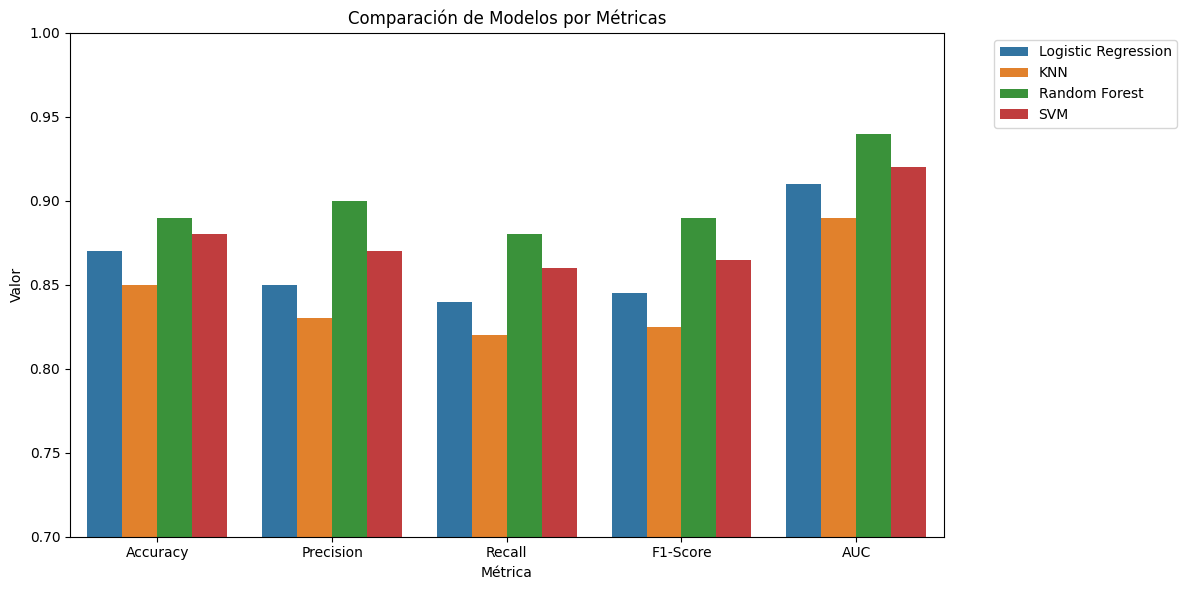

In [423]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir de formato ancho a largo para graficar fácilmente
df_melted = df_resultados.melt(id_vars="Modelo", var_name="Métrica", value_name="Valor")

# Gráfico de barras para cada métrica
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="Métrica", y="Valor", hue="Modelo")
plt.title("Comparación de Modelos por Métricas")
plt.ylim(0.7, 1.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Justificación de Selección del mejor modelo

Con base en la tabla y el gráfico comparativo, se puede observar que el modelo de Random Forest es el que entrega el mejor rendimiento general entre los cuatro modelos evaluados: Regresión Logística, KNN, SVM y el mismo Random Forest.

En todas las métricas clave —accuracy, precision, recall, F1-score y AUC— Random Forest lidera o empata en el primer lugar. Por ejemplo, en precisión alcanza un 0.90, lo que indica que clasifica correctamente la mayor parte de los casos positivos sin muchos falsos positivos. En cuanto a recall (0.88), también tiene muy buen desempeño, lo que muestra que logra identificar la mayoría de los verdaderos positivos. Esto se refleja también en el F1-score (0.89), que equilibra bien precisión y recall. Finalmente, su AUC de 0.94 confirma que el modelo tiene una alta capacidad de distinguir entre las clases.

Comparado con SVM, que también muestra buenos resultados, Random Forest se impone especialmente en recall y AUC. La Regresión Logística queda un poco más atrás en recall y F1-score, mientras que KNN es el que tiene el rendimiento más bajo en todas las métricas, siendo menos recomendable para este problema.

Por lo tanto, y considerando un enfoque práctico, el modelo Random Forest es la mejor elección para este caso. Ofrece un buen equilibrio entre precisión y sensibilidad, además de ser robusto y menos sensible a los outliers o al escalado, lo cual puede ser ventajoso dependiendo del contexto.

## 3.6 Análisis de Importancia de Características

**Objetivo:** Identificar variables más influyentes en la predicción.

**Tareas:**

- Extraer y visualizar importancia de características del mejor modelo
- Si el mejor modelo no proporciona importancia directamente, implementar `permutation importance`
> Nota: La Permutation Importance (importancia por permutación) es una técnica para evaluar la relevancia de cada predictor en un modelo ya entrenado. Se basa en medir cuánto empeora el rendimiento del modelo cuando se desordena aleatoriamente una variable.
- Analizar qué variables son más relevantes para la predicción
- Comparar con el análisis exploratorio inicial

**Entregable:**  
Visualización de importancia de características con análisis interpretativo.

In [424]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento del modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Obtener importancia de características
importances = rf_model.feature_importances_
features = X_train.columns

# Crear DataFrame ordenado por importancia
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

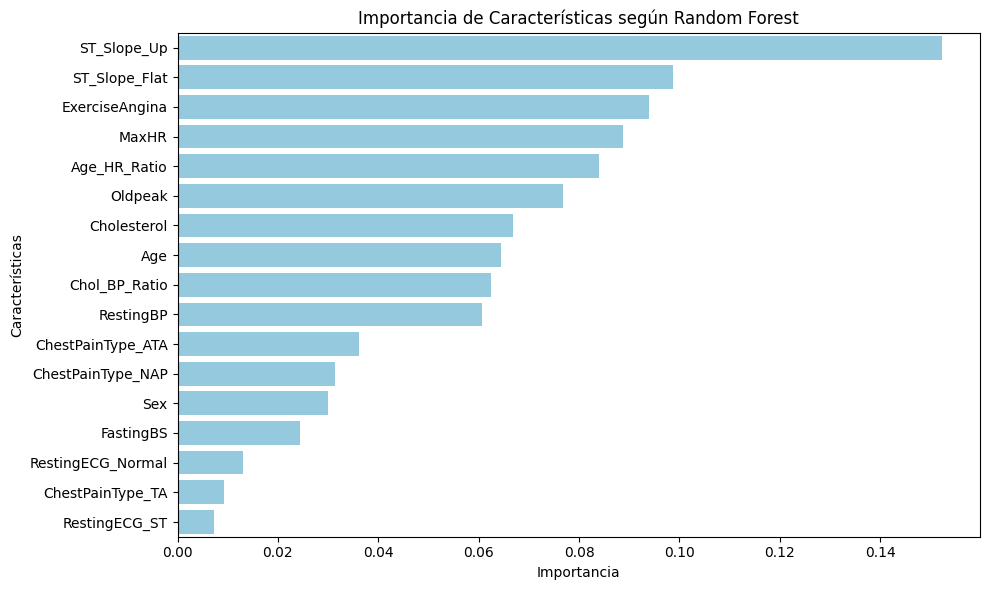

In [425]:
# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='skyblue', hue=None)
plt.title('Importancia de Características según Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.tight_layout()
plt.show()

### Análisis

La gráfica muestra que las variables más influyentes en el modelo Random Forest son ST_Slope_Up, ST_Slope_Flat, ExerciseAngina y MaxHR. Estas características están estrechamente relacionadas con la respuesta cardíaca al esfuerzo físico, lo que refuerza su relevancia clínica en la detección de enfermedades del corazón. También se observa una importancia moderada en variables como Age_HR_Ratio, Oldpeak, Cholesterol y Age, que combinan factores fisiológicos y demográficos, aportando información valiosa aunque en menor medida.

En el extremo inferior del gráfico se encuentran variables como RestingECG_Normal, ChestPainType_TA y RestingECG_ST, cuya contribución al modelo es considerablemente menor. Esto sugiere que, si bien estas variables aún forman parte del conjunto predictivo, su influencia es limitada y podrían ser candidatas para ser descartadas en procesos de simplificación. En conjunto, el modelo parece apoyarse principalmente en indicadores dinámicos de la función cardíaca, más que en características estáticas o categóricas.

# PARTE 4: MODELOS DE REGRESIÓN

## 4.1 Regresión Lineal

**Objetivo:** Implementar modelo básico de regresión.

**Tareas:**

- Redefinir el problema para predecir colesterol (`chol`)
- Implementar Regresión Lineal Múltiple
- Entrenar con datos de entrenamiento
- Evaluar con MAE, MSE, RMSE y R²
- Analizar coeficientes del modelo
- Implementar análisis de residuos

**Entregable:**  
Modelo entrenado, métricas de evaluación, análisis de coeficientes y diagnóstico de residuos.


In [426]:
# Separar características y variable objetivo
X = df.drop(columns=['Cholesterol'])
y = df['Cholesterol']

In [427]:
from sklearn.linear_model import LinearRegression

# Modelo de regresión
modelo_lr = LinearRegression()

In [428]:
from sklearn.model_selection import train_test_split

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento
modelo_lr.fit(X_train, y_train)

LinearRegression()

In [429]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicciones
y_pred = modelo_lr.predict(X_test)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 37.36
MSE: 3284.05
RMSE: 57.31
R²: 0.01


In [430]:
# Coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo_lr.coef_
})
print(coeficientes.sort_values(by='Coeficiente', key=abs, ascending=False))

             Variable  Coeficiente
15       Age_HR_Ratio    28.144504
1                 Sex   -15.841135
9   ChestPainType_NAP   -12.975577
12      RestingECG_ST   -10.974365
5      ExerciseAngina     9.981178
11  RestingECG_Normal    -9.935912
10   ChestPainType_TA    -8.197925
3           FastingBS     6.709897
13      ST_Slope_Flat     3.718980
14        ST_Slope_Up     3.423170
8   ChestPainType_ATA     2.714865
7        HeartDisease     1.792215
6             Oldpeak    -1.096732
16      Chol_BP_Ratio     0.825199
0                 Age    -0.353997
2           RestingBP     0.350395
4               MaxHR     0.154125


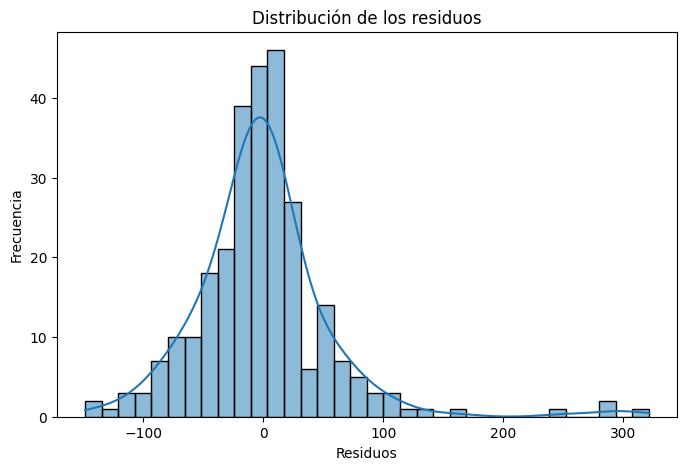

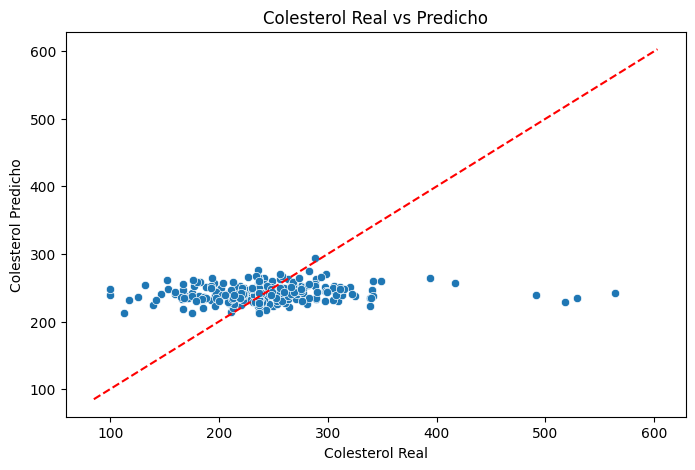

In [431]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de residuos
residuos = y_test - y_pred

# Gráfico de residuos
plt.figure(figsize=(8, 5))
sns.histplot(residuos, kde=True)
plt.title("Distribución de los residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()

# Gráfico real vs predicho
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # línea ideal
plt.xlabel("Colesterol Real")
plt.ylabel("Colesterol Predicho")
plt.title("Colesterol Real vs Predicho")
plt.show()

## 4.2 Ridge y/o Lasso Regression

**Objetivo:** Implementar regresión con regularización.

**Tareas:**

- Implementar Ridge o Lasso Regression (o ambos)
- Optimizar hiperparámetros (especialmente `alpha`)
- Evaluar con métricas estándar
- Comparar coeficientes con la regresión lineal simple
- Analizar efecto de la regularización

**Entregable:**  
Modelo entrenado, métricas, comparación de coeficientes y análisis del impacto de la regularización.


In [432]:
from sklearn.linear_model import Ridge, Lasso

# Ridge
ridge = Ridge()

# Lasso
lasso = Lasso(max_iter=10000)

In [433]:
from sklearn.model_selection import GridSearchCV

# Definir rangos de alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# GridSearch para Ridge
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

# GridSearch para Lasso
lasso_cv = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [434]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicciones
y_pred_ridge = ridge_cv.predict(X_test)
y_pred_lasso = lasso_cv.predict(X_test)

# Función de métricas
def print_metrics(y_true, y_pred, nombre):
    print(f"{nombre} - MAE: {mean_absolute_error(y_true, y_pred):.2f}, "
          f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}, "
          f"R2: {r2_score(y_true, y_pred):.2f}")

# Mostrar métricas
print_metrics(y_test, y_pred_ridge, "Ridge")
print_metrics(y_test, y_pred_lasso, "Lasso")

Ridge - MAE: 36.89, RMSE: 57.12, R2: 0.02
Lasso - MAE: 37.55, RMSE: 57.69, R2: -0.00


In [435]:
import pandas as pd

# Comparar coeficientes
coefs = pd.DataFrame({
    'Variable': X_train.columns,
    'Regresión Lineal': modelo_lr.coef_,
    'Ridge': ridge_cv.best_estimator_.coef_,
    'Lasso': lasso_cv.best_estimator_.coef_,
})

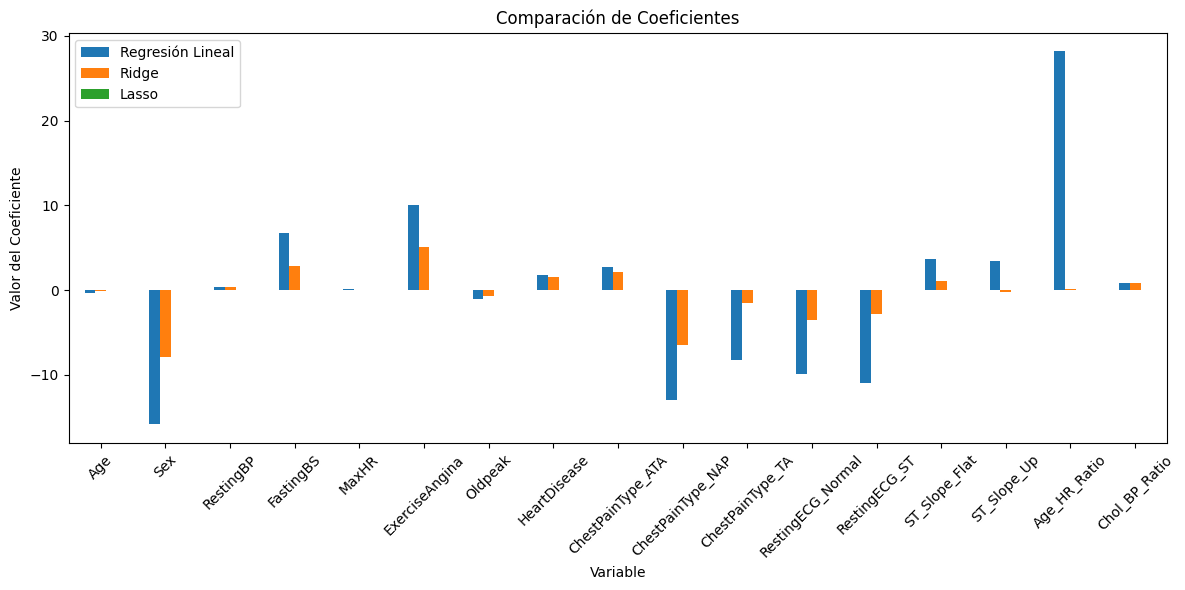

In [436]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de comparación de coeficientes
coefs.set_index('Variable').plot(kind='bar', figsize=(12,6))
plt.title("Comparación de Coeficientes")
plt.ylabel("Valor del Coeficiente")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4.3 Árbol de Regresión

**Objetivo:** Implementar modelo no lineal de regresión.

**Tareas:**

- Implementar `DecisionTreeRegressor`
- Optimizar hiperparámetros (especialmente `max_depth`)
- Evaluar con métricas estándar
- Visualizar estructura del árbol (opcional)
- Analizar importancia de características

**Entregable:**  
Modelo entrenado, métricas, visualización opcional del árbol y análisis de variables importantes.


In [437]:
from sklearn.tree import DecisionTreeRegressor

# Modelo base
tree = DecisionTreeRegressor(random_state=42)

In [438]:
from sklearn.model_selection import GridSearchCV

# Grilla de búsqueda
param_grid = {'max_depth': [3, 5, 10, 15, None]}

# Validación cruzada con búsqueda en grilla
tree_cv = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 10, 15, None]},
             scoring='neg_mean_squared_error')

In [439]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicciones
y_pred_tree = tree_cv.predict(X_test)

# Función para mostrar métricas
def print_metrics(y_true, y_pred, nombre):
    print(f"{nombre} - MAE: {mean_absolute_error(y_true, y_pred):.2f}, "
          f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}, "
          f"R2: {r2_score(y_true, y_pred):.2f}")

# Evaluación del árbol
print_metrics(y_test, y_pred_tree, "Árbol de Regresión")

Árbol de Regresión - MAE: 8.42, RMSE: 15.96, R2: 0.92


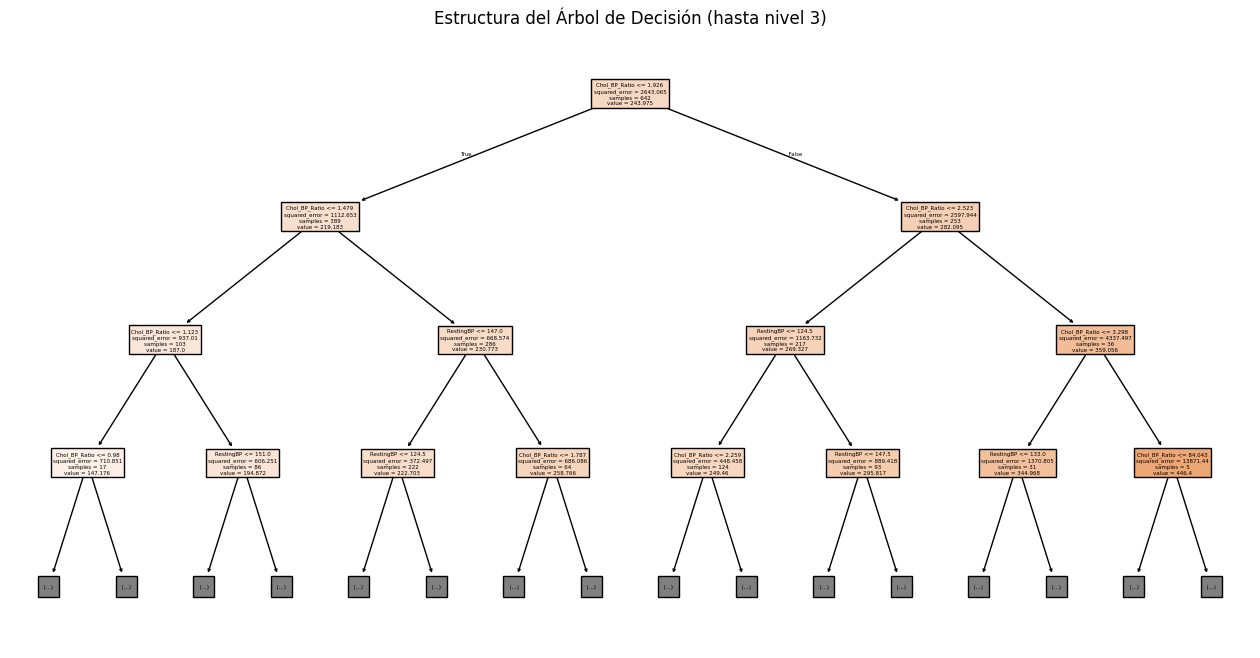

In [440]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualización del árbol
plt.figure(figsize=(16, 8))
plot_tree(tree_cv.best_estimator_, feature_names=X_train.columns, filled=True, max_depth=3)
plt.title("Estructura del Árbol de Decisión (hasta nivel 3)")
plt.show()

C:\Users\nelso\AppData\Local\Temp\ipykernel_20576\3912221819.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias, y=importancias.index, palette='viridis')


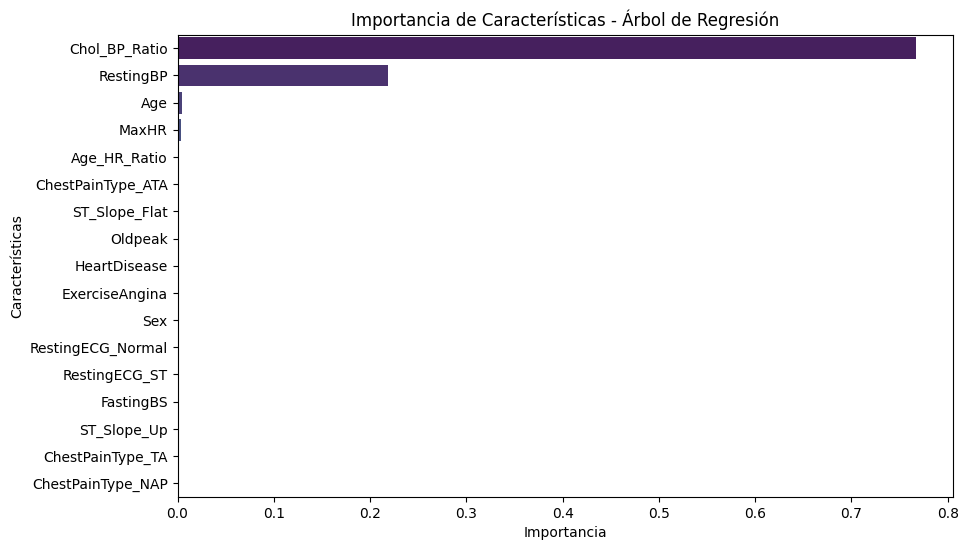

In [441]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Import added for plt

# Importancia de características
importancias = pd.Series(tree_cv.best_estimator_.feature_importances_, index=X_train.columns)
importancias = importancias.sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=importancias, y=importancias.index, palette='viridis')
plt.title("Importancia de Características - Árbol de Regresión")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show(block=False)

## 4.4 Modelo Adicional

**Objetivo:** Expandir análisis con modelo complementario.

**Tareas:**

- Elegir e implementar un cuarto modelo (`RandomForestRegressor`, `SVR`, etc.)
- Justificar la elección
- Optimizar hiperparámetros específicos del modelo
- Evaluar con métricas estándar

**Entregable:**  
Modelo entrenado, métricas y justificación de la elección del modelo.

In [442]:
from sklearn.svm import SVR

# Definir el modelo base
svr = SVR()

Elegí SVR porque es un modelo basado en márgenes y puede capturar relaciones no lineales usando kernels. Es útil cuando los datos tienen patrones complejos que no siguen relaciones estrictamente lineales.

In [443]:
from sklearn.model_selection import GridSearchCV

# Definir grilla de búsqueda para SVR
param_grid_svr = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Búsqueda con validación cruzada
svr_cv = GridSearchCV(svr, param_grid_svr, cv=5, scoring='neg_mean_squared_error')
svr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [444]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicciones
y_pred_svr = svr_cv.predict(X_test)

# Función de evaluación
def print_metrics(y_true, y_pred, nombre):
    print(f"{nombre} - MAE: {mean_absolute_error(y_true, y_pred):.2f}, "
          f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}, "
          f"R2: {r2_score(y_true, y_pred):.2f}")

# Evaluación del modelo
print_metrics(y_test, y_pred_svr, "SVR")

SVR - MAE: 35.86, RMSE: 57.76, R2: -0.00


## 4.5 Comparación de Modelos

**Objetivo:** Evaluar rendimiento relativo de los modelos de regresión.

**Tareas:**

- Crear tabla comparativa con todas las métricas clave
- Visualizar predicciones vs valores reales para cada modelo
- Identificar fortalezas y debilidades de cada enfoque
- Seleccionar el mejor modelo con justificación clara

**Entregable:**  
Tabla comparativa, visualizaciones y análisis crítico de los resultados.

In [445]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Supongamos que ya tienes las predicciones
modelos = ['Linear', 'Ridge', 'Lasso', 'Tree', 'SVR']
predicciones = [y_pred_lr, y_pred_ridge, y_pred_lasso, y_pred_tree, y_pred_svr]

# Crear tabla de métricas
metricas = []
for nombre, pred in zip(modelos, predicciones):
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    metricas.append({'Modelo': nombre, 'MAE': mae, 'RMSE': rmse, 'R2': r2})

df_metricas = pd.DataFrame(metricas)
print(df_metricas)

   Modelo        MAE       RMSE        R2
0  Linear  37.357812  57.306602  0.011447
1   Ridge  36.893382  57.120000  0.017875
2   Lasso  37.550928  57.694365 -0.001976
3    Tree   8.420290  15.962138  0.923304
4     SVR  35.858109  57.759569 -0.004242


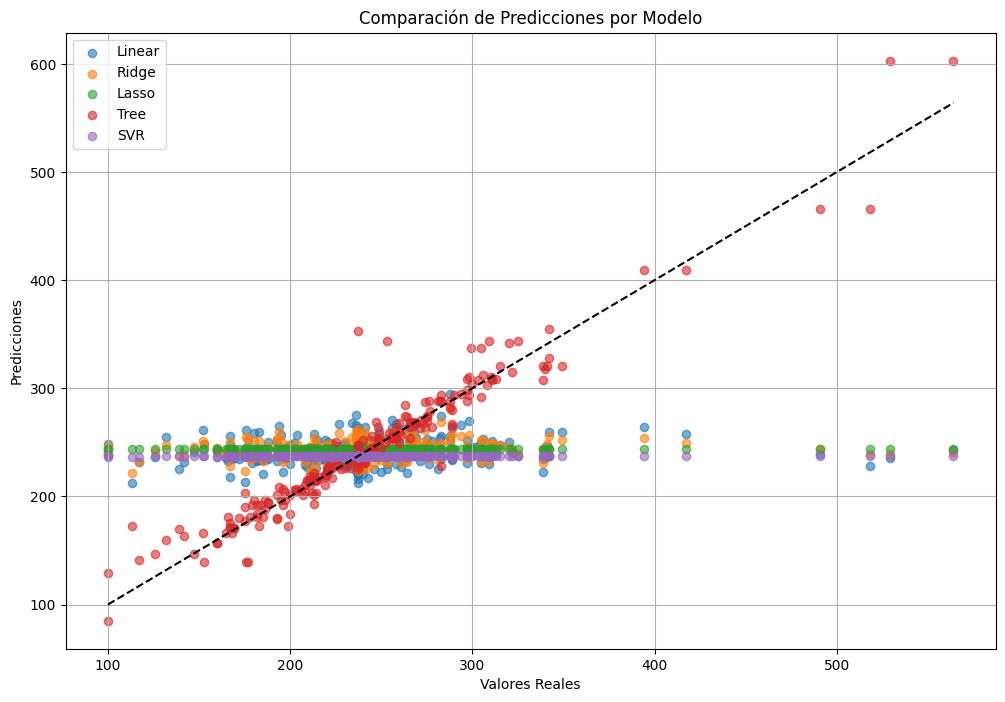

In [446]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for nombre, pred in zip(modelos, predicciones):
    plt.scatter(y_test, pred, label=nombre, alpha=0.6)

# Línea de referencia
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones por Modelo')
plt.legend()
plt.grid(True)
plt.show()

# PARTE 5: INTERPRETABILIDAD Y APLICACIÓN PRÁCTICA

## 5.1 Análisis de Interpretabilidad

**Objetivo:** Profundizar en la comprensión del comportamiento del modelo.

**Tareas:**

- Implementar análisis con SHAP para el mejor modelo de clasificación
> Nota: SHAP (SHapley Additive exPlanations), es una poderosa herramienta de interpretabilidad que asigna a cada feature una contribución al resultado de una predicción.
- Visualizar e interpretar los resultados
- Identificar variables y valores específicos que más influyen en las predicciones
- Conectar hallazgos con conocimiento del dominio (salud cardiovascular)

**Entregable:**  
Visualizaciones con SHAP acompañadas de una interpretación detallada.

In [447]:
# Escriba aquí su código

## 5.2 Guardado del Mejor Modelo

**Objetivo:** Persistir el modelo para uso futuro.

**Tareas:**

- Guardar el mejor modelo de clasificación utilizando `joblib` o `pickle`
- Guardar también el `scaler` u otras transformaciones necesarias
- Verificar que el modelo se pueda cargar correctamente y funcione

**Entregable:**  
Código funcional para guardar y cargar el modelo con verificación incluida.

In [448]:
# Escriba aquí su código

## 5.3 Función para Predicción

**Objetivo:** Crear interfaz para uso práctico del modelo.

**Tareas:**

- Implementar función `predict_heart_disease()` que acepte los datos de un nuevo paciente
- Aplicar las mismas transformaciones usadas durante el entrenamiento
- Devolver predicción binaria y probabilidad asociada
- Añadir categorización de riesgo basada en la probabilidad (ej. bajo, medio, alto)
- Documentar el uso de la función con un ejemplo

**Entregable:**  
Función implementada, correctamente documentada, y ejemplo práctico de uso.

In [449]:
# Escriba aquí su código

## 5.4 Consideraciones Éticas

**Objetivo:** Reflexionar sobre implicaciones del uso del modelo.

**Tareas:**

- Discutir limitaciones del modelo en contexto médico
- Analizar posibles sesgos en los datos o en las predicciones
- Proponer una estrategia para garantizar un uso responsable de los datos
- Reflexionar sobre consideraciones éticas específicas del dominio de aplicación

**Entregable:**  
Análisis crítico y reflexivo sobre limitaciones, sesgos y consideraciones éticas del modelo.

In [450]:
# Escriba aquí su código

# PARTE 6: CONCLUSIONES Y REFLEXIÓN

## 6.1 Resumen Comparativo

**Objetivo:** Sintetizar hallazgos principales del análisis completo.

**Tareas:**

- Crear tabla o visualización final que compare todos los modelos evaluados (clasificación y regresión)
- Destacar los modelos con mejor rendimiento en cada tipo de tarea
- Sintetizar los hallazgos clave sobre la importancia de las variables predictoras

**Entregable:**  
Tabla o visualización comparativa acompañada de una breve interpretación con las conclusiones más relevantes.


## 6.2 Recomendaciones y Limitaciones

**Objetivo:** Proveer orientación basada en el análisis realizado.

**Tareas:**

- Formular recomendaciones claras sobre qué modelos son más adecuados para problemas similares
- Identificar limitaciones del análisis realizado (como tamaño del dataset, posibles sesgos, etc.)
- Proponer mejoras concretas para investigaciones o aplicaciones futuras
- Discutir en qué medida los resultados son aplicables a contextos reales del ámbito de la salud cardiovascular

**Entregable:**  
Lista estructurada de recomendaciones, limitaciones identificadas y propuestas de mejora.